In [1]:

import env
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from env import get_connection

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import viz
np.random.seed(42)

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Create a DataFrame (optional, if you want to work with pandas)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [8]:
# Load the Iris dataset
df = load_iris()

# The data is stored in 'iris.data'
X = df.data

# The target variable is stored in 'iris.target'
y = df.target

# You can also access the feature names and target names
feature_names = df.feature_names
target_names = df.target_names

# Create a DataFrame (optional, if you want to work with pandas)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.columns = [col.lower().replace(' ','_') for col in df.columns]


In [9]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


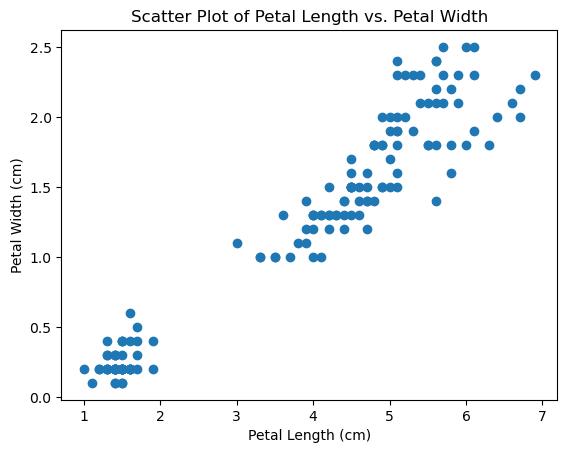

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df['petal_length_(cm)'], df['petal_width_(cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.show()


In [11]:
X = df[['sepal_length_(cm)', 'sepal_width_(cm)']]

In [19]:
kmeans = KMeans(n_clusters=2)
df['cluster'] = kmeans.fit_predict(X)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


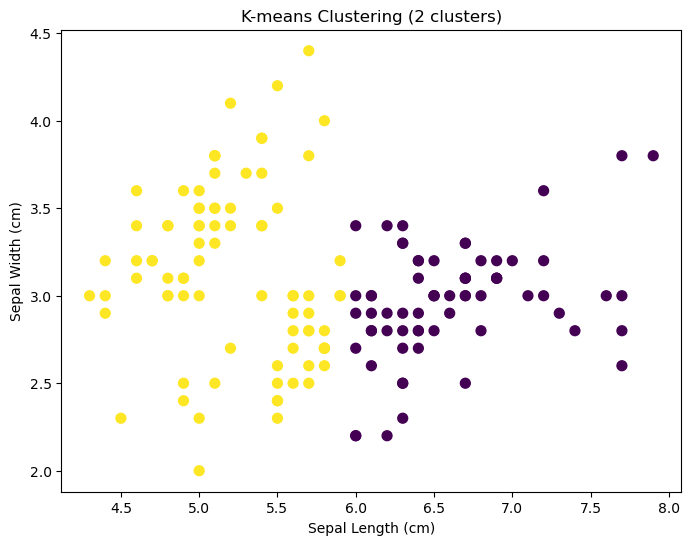

In [20]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal_length_(cm)'], X['sepal_width_(cm)'], c=df['cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering (2 clusters)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Show the plot
plt.show()

In [21]:
kmeans.cluster_centers_


array([[6.61044776, 2.96567164],
       [5.22409639, 3.1313253 ]])

In [22]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


,sepal_length_(cm),sepal_width_(cm)
0,6.610448,2.965672
1,5.224096,3.131325


In [23]:
df.groupby('cluster')[['sepal_length_(cm)', 'sepal_width_(cm)']].mean()


,sepal_length_(cm),sepal_width_(cm)
cluster,,
0,6.610448,2.965672
1,5.224096,3.131325


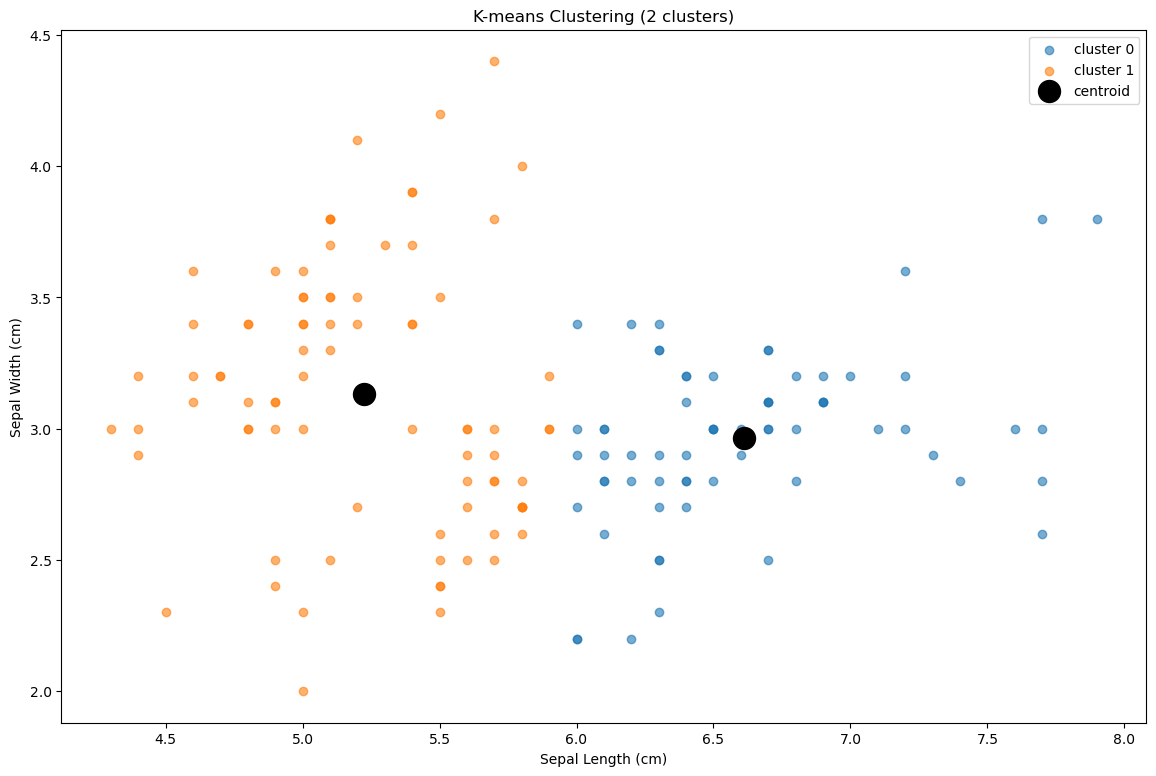

In [24]:
# Create a scatter plot
plt.figure(figsize=(14, 9))
for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset['sepal_length_(cm)'], subset['sepal_width_(cm)'],
                label='cluster ' + str(cluster), alpha=0.6)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='.', s=1000, label='centroid')
    
# Set plot labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering (2 clusters)')
plt.legend()

# Show the plot
plt.show()


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


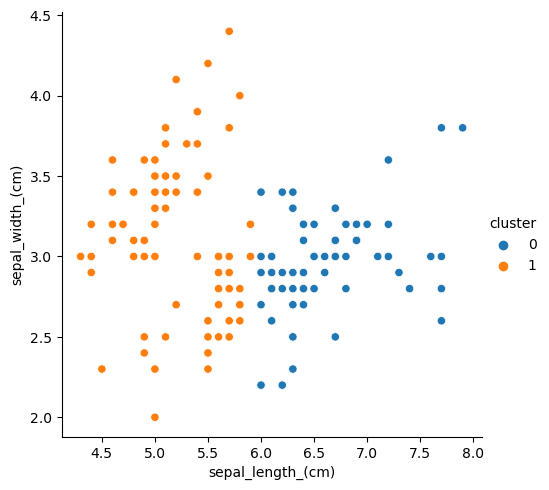

In [25]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='sepal_length_(cm)', y='sepal_width_(cm)', hue='cluster')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


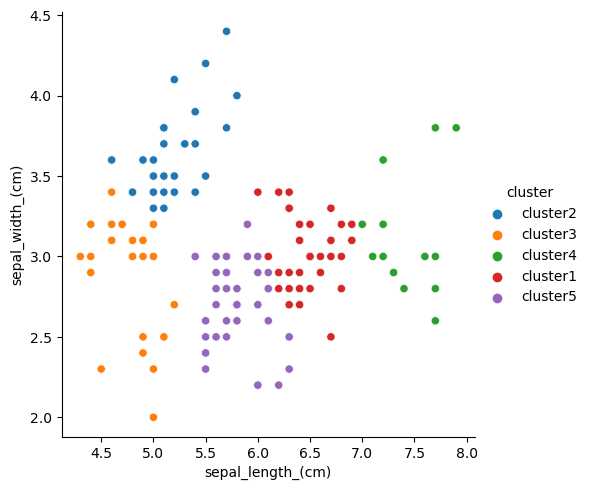

In [26]:
kmeans = KMeans(n_clusters=5).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='sepal_length_(cm)', y='sepal_width_(cm)', hue='cluster')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

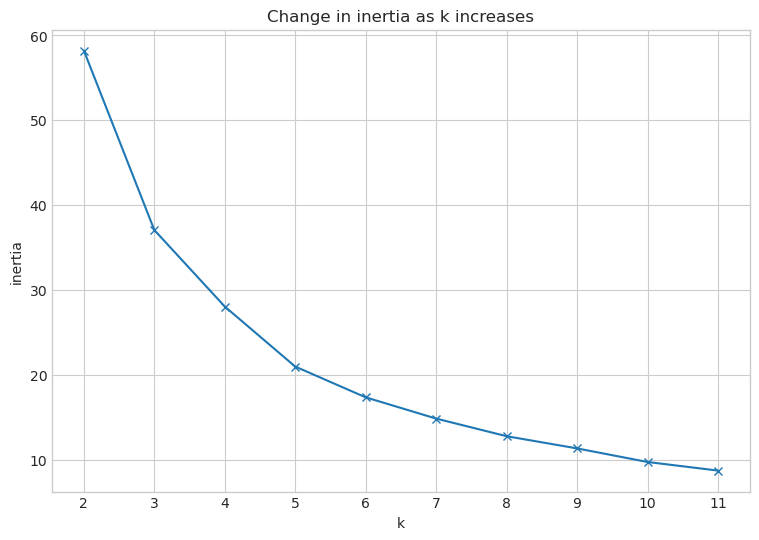

In [27]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


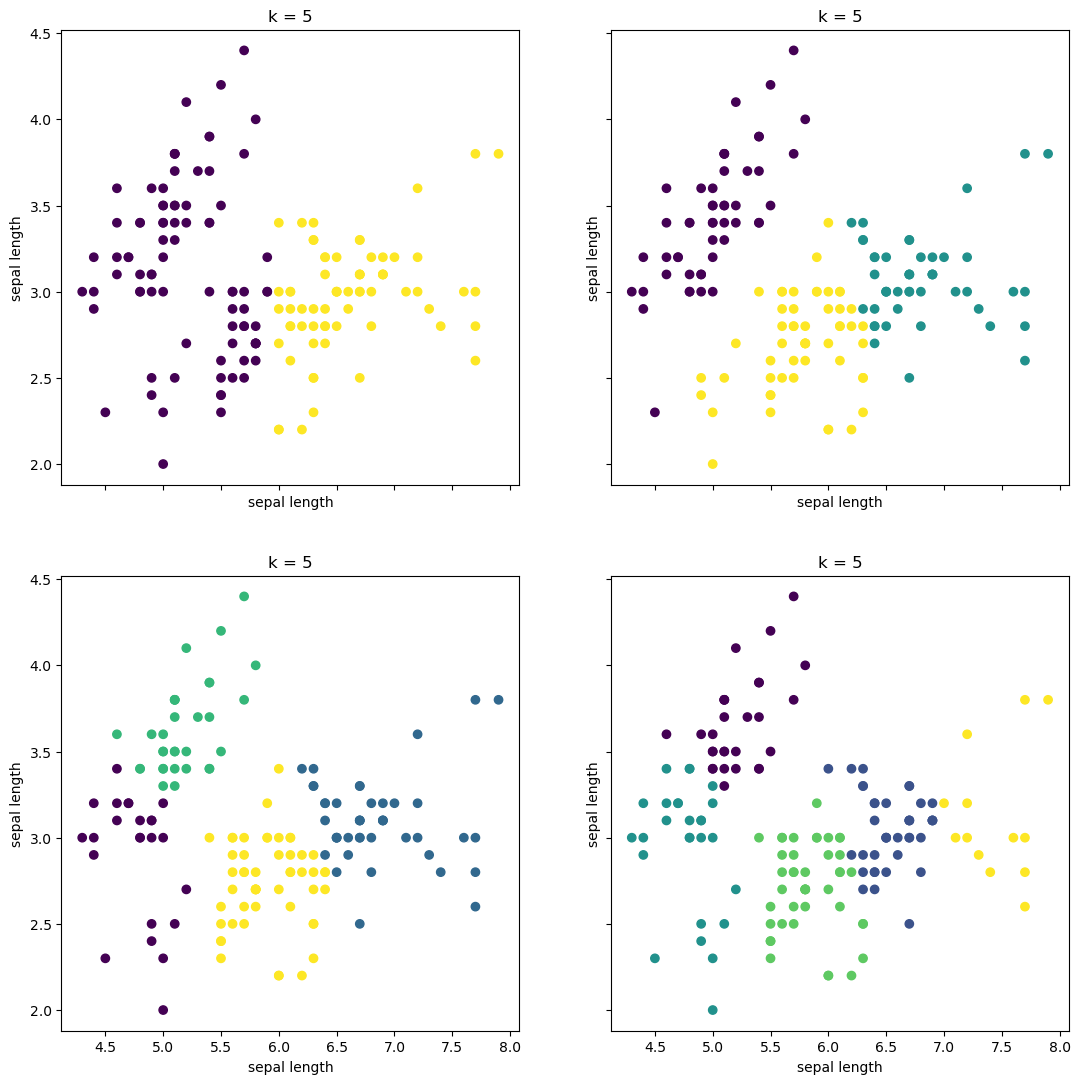

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    cluster = KMeans(k).fit(X).predict(X)
    ax.scatter(X['sepal_length_(cm)'], X['sepal_width_(cm)'], c=cluster)
    ax.set(title=f'k = {5}', xlabel='sepal length', ylabel='sepal length')

plt.show()


## Scaling

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


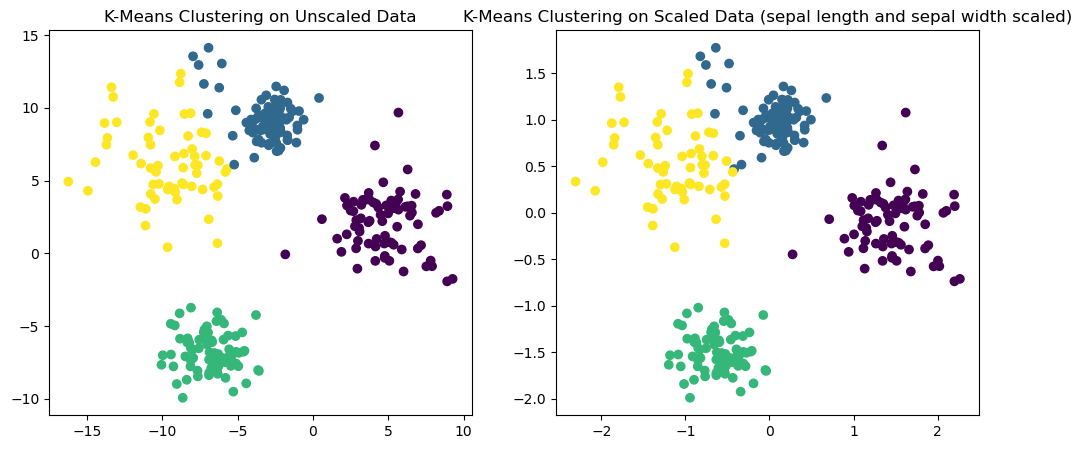

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create synthetic data with different scales
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=[1, 2, 1.5, 3])

# Separate the features you want to scale
X_to_scale = X[:, :2]  # Assuming 'sepal length' and 'sepal width' are the first two columns

# Leave other features unscaled
X_unscaled = X[:, 2:]

# Scale the selected features
scaler = StandardScaler()
X_scaled = np.hstack((scaler.fit_transform(X_to_scale), X_unscaled))

# Unscaled data
kmeans_unscaled = KMeans(n_clusters=4, random_state=42)
clusters_unscaled = kmeans_unscaled.fit_predict(X)

# Scaled data
kmeans_scaled = KMeans(n_clusters=4, random_state=42)
clusters_scaled = kmeans_scaled.fit_predict(X_scaled)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters_unscaled, cmap='viridis')
plt.title("K-Means Clustering on Unscaled Data")
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_scaled, cmap='viridis')
plt.title("K-Means Clustering on Scaled Data (sepal length and sepal width scaled)")
plt.show()


## How does scaling impact the results of clustering?


Scaling I don't see a difference in this case